## Aim 1 Analysis (units of days)

Sensitivity, PPV, NPV, sensitivity analysis of varying numbers of shedding individuals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Description of Data

The data used in this analysis depicts cases, wastewater signal and estimated number of individuals shedding from September 10th 2023 to July 13th 2024. 

The columns are as follows:

1. `day` : the day being described
2. `testing_day`: whether or not the wastewater at Point Loma was tested for HAV on that day--  1 if tested, 0 if not
3. `case` : whether or not there was a case with an episode date of that day
4. `num_shedding` : the number of people estimated to be shedding on that day
5. `wastewater_signal` : 1 if wastewater was positive for HAV nucleic acids on that day, 0 if not

In [2]:
aim1_daily = pd.read_csv("aim1_daily_final.csv")

In [3]:
aim1_daily.head(10)

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1.0
1,11-Sep-23,1,0,0,0.0
2,12-Sep-23,0,0,0,NaN
3,13-Sep-23,1,0,0,0.0
4,14-Sep-23,0,0,0,NaN
5,15-Sep-23,0,0,0,NaN
6,16-Sep-23,0,0,0,NaN
7,17-Sep-23,1,0,0,0.0
8,18-Sep-23,1,0,0,0.0
9,19-Sep-23,0,0,0,NaN


In [4]:
# Number of days represented
aim1_daily.shape[0]

308

In [5]:
# Number of cases
cases = aim1_daily['case'].sum()
cases

12

In [6]:
# Selecting only testing days
aim1 = aim1_daily[aim1_daily['testing_day'] == 1]
aim1.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1.0
1,11-Sep-23,1,0,0,0.0
3,13-Sep-23,1,0,0,0.0
7,17-Sep-23,1,0,0,0.0
8,18-Sep-23,1,0,0,0.0


In [7]:
# Number of testing days
aim1.shape[0]

131

In [8]:
aim1.dtypes

day                   object
testing_day            int64
case                   int64
num_shedding           int64
wastewater_signal    float64
dtype: object

In [9]:
# Number of positive days
pos_days = aim1['wastewater_signal'].sum()
pos_days

48.0

First, finding **true positives (TP)**, **true negatives (TN)**, **false positives (FP)** and **false negatives (FN)**
- True positives (TP) will be defined as days when Hepatitis A virus is detected in wastewater and there are cases of individuals shedding the virus. 
- False negatives (FN) will be defined as days when the virus is not detected in wastewater, but there are still cases of individuals shedding the virus. 
- True negatives (TN) will be defined as days with no virus detections in wastewater and no individuals shedding the virus. 
- False positives (FP) will be defined as days when the virus is detected in wastewater, but no individuals are shedding virus

In [10]:
t_p = aim1[(aim1['wastewater_signal'] == 1) & (aim1['num_shedding'] > 0)]
f_n = aim1[(aim1['wastewater_signal'] == 0) & (aim1['num_shedding'] > 0)]
t_n = aim1[(aim1['wastewater_signal'] == 0) & (aim1['num_shedding'] == 0)]
f_p = aim1[(aim1['wastewater_signal'] == 1) & (aim1['num_shedding'] == 0)]

In [11]:
# Number of true positives
len(t_p)

25

In [12]:
# Number of false negatives
len(f_n)

27

In [13]:
# Number of true negatives
len(t_n)

56

In [14]:
# Number of false positives
len(f_p)

23

### Sensitivity Overall

Sensitivity will be defined as the probability of a wastewater detection given that one or more persons are shedding the virus (TP / (TP+FN))

In [15]:
# Sensitivity for detecting one or more people shedding
sensitivity_cdc = len(t_p) / (len(t_p) +len(f_n))
sensitivity_cdc

0.4807692307692308

### Positive Predictive Value
Positive predictive value (PPV) will be the probability that at least one person is shedding the virus when a wastewater detection occurs (TP / (TP+FP))

In [16]:
# Probability of one or more people shedding given wastewater detection
ppv_cdc = len(t_p) / (len(t_p) + len(f_p))
ppv_cdc

0.5208333333333334

### Negative Predictive Value
Negative predictive value (NPV) will be the probability that no persons are shedding the virus in the absence of wastewater detections (TN / (TN+FN))

In [17]:
# probability that no persons are shedding the virus in the absence of wastewater detections
npv_cdc = len(t_n) / (len(t_n) + len(f_n))
npv_cdc

0.6746987951807228

### Sensitivity for Specific Numbers of People Shedding
For this, the definitions of true positive (TP), false negative (FN), true negative (TN), and false positive (FP) will be adjusted based on the specified number of cases shedding. 
- True positives (TP) will be defined as days when Hepatitis A virus is detected in wastewater and at least the specified number of cases are shedding the virus.
- False negatives (FN) will be days when the virus is not detected in wastewater, but at least the specified number of cases are shedding the virus. 
- True negatives (TN) will be days with no virus detections and fewer than the specified number of cases shedding the virus. 
- False positives (FP) will be days when the virus is detected in wastewater, but fewer than the specified number of cases are shedding the virus.

In [18]:
# Finding the maximum number of individuals assumed to be shedding at any given time in our data
max_shedding = aim1['num_shedding'].max()
max_shedding

4

**Since the max number of individuals shedding at any given time is 4 based on our assumptions and criteria, we will do the sensitivity analysis for 2, 3 and 4 individuals shedding**

In [19]:
# Functions for tp, fn, tn, fp with varying thresholds
def tp(threshold, data):
    df = data[(data['wastewater_signal'] == 1) & (data['num_shedding'] >= threshold)]
    return df.shape[0]

def fn(threshold, data):
    df = data[(data['wastewater_signal'] == 0) & (data['num_shedding'] >= threshold)]
    return df.shape[0]

def tn(threshold, data):
    df = data[(data['wastewater_signal'] == 0) & (data['num_shedding'] < threshold)]
    return df.shape[0]

def fp(threshold, data):
    df = data[(data['wastewater_signal'] == 1) & (data['num_shedding'] < threshold)]
    return df.shape[0]  

In [20]:
# Sensitivity, PPV, NPV functions
def sensitivity(threshold, data):
    return (tp(threshold, data) / (tp(threshold, data) + fn(threshold, data)))

def ppv(threshold, data):
    return tp(threshold, data) / (tp(threshold, data) + fp(threshold, data))

def npv(threshold, data):
    return tn(threshold, data) / (tn(threshold, data) + fn(threshold, data))

In [21]:
# For 2 individuals
sensitivity_2 = sensitivity(2, aim1)
ppv_2 = ppv(2, aim1)
npv_2 = npv(2, aim1)
print(f'sensitivity: {sensitivity_2}, ppv: {ppv_2}, npv: {npv_2}')

sensitivity: 0.5263157894736842, ppv: 0.20833333333333334, npv: 0.891566265060241


In [22]:
# For 3 individuals
sensitivity_3 = sensitivity(3, aim1)
ppv_3 = ppv(3, aim1)
npv_3 = npv(3, aim1)
print(f'sensitivity: {sensitivity_3}, ppv: {ppv_3}, npv: {npv_3}')

sensitivity: 0.5, ppv: 0.1875, npv: 0.891566265060241


In [23]:
# For 4 individuals
sensitivity_4 = sensitivity(4, aim1)
ppv_4 = ppv(4, aim1)
npv_4 = npv(4, aim1)
print(f'sensitivity: {sensitivity_4}, ppv: {ppv_4}, npv: {npv_4}')

sensitivity: 0.5, ppv: 0.125, npv: 0.927710843373494


## Varying the Shedding Period

The shedding period for Hepatitis A virus given by the CDC is two weeks prior to symptom onset, and one week following symptom onset. 

Here, the following shedding periods are tested:
1. 1 week before and 1 week after symptom onset
2. 1 week before and 4 weeks after symptom onset
3. 2 weeks before and 4 weeks after symptom onset

In addition to the CDC shedding period of 2 weeks before and 1 week after which we have already tested. 


Sensitivity is calculated for all.

NPV and PPV are calculated for >= 1 individual shedding for all 3 periods.

The purpose is to get a range of possible values, not just the ones based on our (recommended) assumption of the shedding period. 


In [24]:
# Importing the different data files
shedding_1 = pd.read_csv("shedding_1.csv")
shedding_2 = pd.read_csv("shedding_2.csv")
shedding_3 = pd.read_csv("shedding_3.csv")

In [25]:
# Examining the data
shedding_1.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1.0
1,11-Sep-23,1,0,0,0.0
2,12-Sep-23,0,0,0,NaN
3,13-Sep-23,1,0,0,0.0
4,14-Sep-23,0,0,0,NaN


### Shedding Period 1

1 week before and 1 week after symptom onset (inclusive)

In [26]:
# Selecting only testing days
s1_testing = shedding_1[shedding_1['testing_day'] == 1]
s1_testing.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1.0
1,11-Sep-23,1,0,0,0.0
3,13-Sep-23,1,0,0,0.0
7,17-Sep-23,1,0,0,0.0
8,18-Sep-23,1,0,0,0.0


In [27]:
# Sensitivity for Shedding Period 1
sensitivity_s1 = sensitivity(1, s1_testing)
sensitivity_s1

0.5365853658536586

In [28]:
# Max shedding assuming Shedding Period 1
max_1 = s1_testing['num_shedding'].max()
max_1

4

In [29]:
# Sensitivity for varying numbers of people shedding
ss1_2 = sensitivity(2, s1_testing)
ss1_3 = sensitivity(3, s1_testing)
ss1_4 = sensitivity (4, shedding_1)
print(f'2  or more individuals shedding: {ss1_2}\n3  or more individuals shedding: {ss1_3}\n4  or more individuals shedding: {ss1_4}')

2  or more individuals shedding: 0.6923076923076923
3  or more individuals shedding: 0.6666666666666666
4  or more individuals shedding: 0.6666666666666666


### Shedding Period 2

1 week before and 4 weeks after symptom onset (inclusive)

In [30]:
# Selecting only testing days
s2_testing = shedding_2[shedding_2['testing_day'] == 1]
s2_testing.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1.0
1,11-Sep-23,1,0,0,0.0
3,13-Sep-23,1,0,0,0.0
7,17-Sep-23,1,0,0,0.0
8,18-Sep-23,1,0,0,0.0


In [31]:
# Sensitivity for Shedding Period 2
sensitivity_s2 = sensitivity(1, s2_testing)
sensitivity_s2

0.4605263157894737

In [32]:
# # Max shedding assuming Shedding Period 2
max_2 = s2_testing['num_shedding'].max()
max_2

5

In [33]:
# Sensitivity for varying numbers of people shedding
ss2_2 = sensitivity(2, s2_testing) 
ss2_3 = sensitivity(3, s2_testing)
ss2_4 = sensitivity (4, s2_testing)
ss2_5 = sensitivity (5, s2_testing)
print(f'2 or more individuals shedding: {ss2_2}\n3 or more individuals shedding: {ss2_3}\n4 or more individuals shedding: {ss2_4}\n5 or more individuals shedding: {ss2_5}')

2 or more individuals shedding: 0.5806451612903226
3 or more individuals shedding: 0.5666666666666667
4 or more individuals shedding: 0.6666666666666666
5 or more individuals shedding: 0.8333333333333334


### Shedding Period 3
 2 weeks before and 4 weeks after symptom onset (inclusive)
 

In [34]:
# Selecting only testing days
s3_testing = shedding_3[shedding_3['testing_day'] == 1]
s3_testing.head()

,day,testing_day,case,num_shedding,wastewater_signal
0,10-Sep-23,1,0,0,1.0
1,11-Sep-23,1,0,0,0.0
3,13-Sep-23,1,0,0,0.0
7,17-Sep-23,1,0,0,0.0
8,18-Sep-23,1,0,0,0.0


In [35]:
# Sensitivity for Shedding Period 3
sensitivity_s3 = sensitivity(1, s3_testing)
sensitivity_s3

0.4418604651162791

In [36]:
# Max shedding assuming Shedding Period 3
max_3 = s3_testing['num_shedding'].max()
max_3

5

In [37]:
# Sensitivity for varying numbers of people shedding
ss3_2 = sensitivity(2, s3_testing)
ss3_3 = sensitivity(3, s3_testing)
ss3_4 = sensitivity (4, s3_testing)
ss3_5 = sensitivity (5, s3_testing)
print(f'2 or more individuals shedding: {ss3_2}\n3 or more individuals shedding: {ss3_3}\n4 or more individuals shedding: {ss3_4}\n5 or more individuals shedding: {ss3_5}')

2 or more individuals shedding: 0.5
3 or more individuals shedding: 0.5
4 or more individuals shedding: 0.6
5 or more individuals shedding: 0.7777777777777778


### PPV and NPV for different shedding periods

But only for >= 1 individual shedding

In [38]:
# PPV
ppv_shedding_1 = ppv(1, s1_testing)
ppv_shedding_2 = ppv(1, s2_testing)
ppv_shedding_3 = ppv(1, s3_testing)
print(f'Shedding period 1 (1 week before and 1 week after): {ppv_shedding_1}\nCDC Shedding period (2 weeks before 1 week after): {ppv_cdc}\nShedding period 2 (1 week before and 4 weeks after): {ppv_shedding_2}\nShedding period 3 (2 weeks before 4 weeks after): {ppv_shedding_3}')



Shedding period 1 (1 week before and 1 week after): 0.4583333333333333
CDC Shedding period (2 weeks before 1 week after): 0.5208333333333334
Shedding period 2 (1 week before and 4 weeks after): 0.7291666666666666
Shedding period 3 (2 weeks before 4 weeks after): 0.7916666666666666


In [39]:
# NPV
npv_shedding_1 = npv(1, s1_testing)
npv_shedding_2 = npv(1, s2_testing)
npv_shedding_3 = npv(1, s3_testing)
print(f'Shedding period 1 (1 week before and 1 week after): {npv_shedding_1}\nCDC Shedding period (2 weeks before 1 week after): {npv_cdc}\nShedding period 2 (1 week before and 4 weeks after): {npv_shedding_2}\nShedding period 3 (2 weeks before 4 weeks after): {npv_shedding_3}')


Shedding period 1 (1 week before and 1 week after): 0.7710843373493976
CDC Shedding period (2 weeks before 1 week after): 0.6746987951807228
Shedding period 2 (1 week before and 4 weeks after): 0.5060240963855421
Shedding period 3 (2 weeks before 4 weeks after): 0.42168674698795183


In [40]:
sensitivity_data= pd.read_csv('sensitivities.csv')

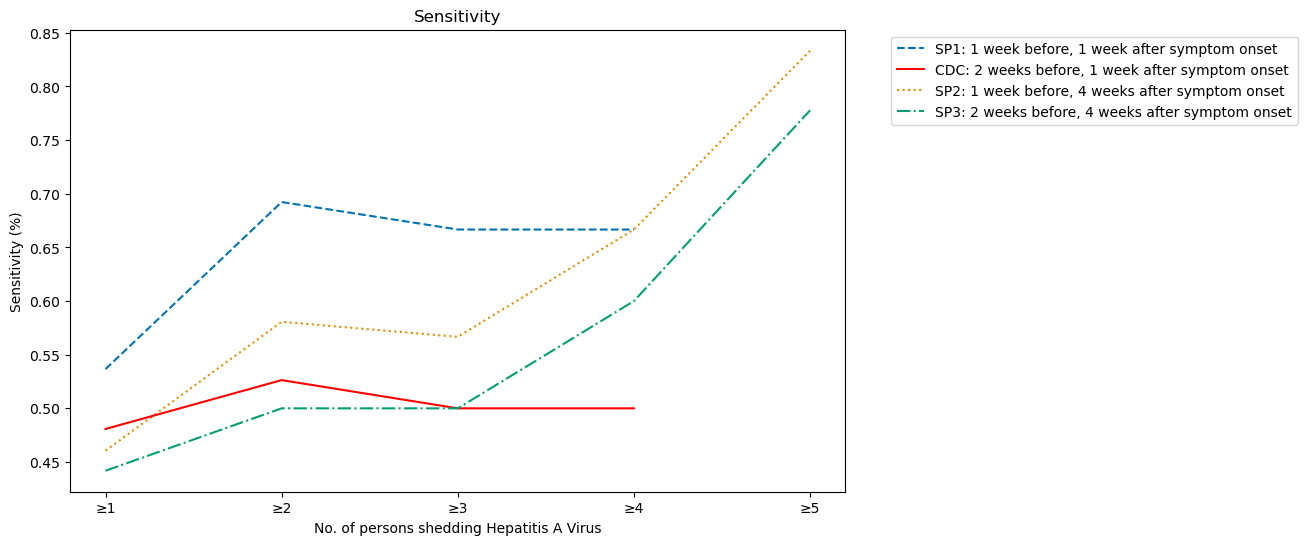

In [41]:

darker_palette = sns.color_palette("colorblind", 3)  
colors = {
    'SP1: 1 week before, 1 week after symptom onset': darker_palette[0],
    'SP2: 1 week before, 4 weeks after symptom onset': darker_palette[1],
    'SP3: 2 weeks before, 4 weeks after symptom onset': darker_palette[2],
    'CDC: 2 weeks before, 1 week after symptom onset': 'red'
}
linestyles = {
    'SP1: 1 week before, 1 week after symptom onset': 'dashed',
    'SP2: 1 week before, 4 weeks after symptom onset': 'dotted',
    'SP3: 2 weeks before, 4 weeks after symptom onset': 'dashdot',
    'CDC: 2 weeks before, 1 week after symptom onset': 'solid'
}

plt.figure(figsize=(10, 6))
for period in sensitivity_data['shedding_period'].unique():
    period_data = sensitivity_data[sensitivity_data['shedding_period'] == period]
    sns.lineplot(data=period_data, x='num_shedding', y='sensitivity', 
                 color=colors[period], linestyle=linestyles[period], label=period)


plt.xticks(ticks=sensitivity_data['num_shedding'].unique(), 
           labels=sensitivity_data['num_shedding'].unique())


plt.title('Sensitivity')
plt.xlabel('No. of persons shedding Hepatitis A Virus')
plt.ylabel('Sensitivity (%)')


handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3] 
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Conclusions

- Moderately high sensitivity, PPV and NPV for detecting a single case shedding
- decline in PPV as number of individuals shedding increases
- increase in sensitivity for higher number of people shedding